In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Physical Constants (SI units)
G=6.67e-11
AU=1.5e11 #meters. Distance between sun and earth.
daysec=24.0*60*60 #seconds in a day

In [3]:
#####run specfic constants. Change as needed#####
#Masses in kg
Ma=6.0e24 #always set as smaller mass
Mb=2.0e30 #always set as larger mass

#Time settings
t=0.0 #Starting time
dt=.01*daysec #Time set for simulation
tend=300*daysec #Time where simulation ends

#Intial conditions (posistion [m] and velocities [m/s] in x,y,z coorindates)
#For Ma
xa=1.0*AU
ya=0.0

vxa=0.0
vya=30000.0

#For Mb
xb=0.0
yb=0.0

vxb=0.0
vyb=0.0

In [4]:
#Function to compute the force between the two objects
def Fg(xa,ya,xb,yb):
    #compute r between Ma and Mb
    rx=xb-xa
    ry=yb-ya
    
    #compute r^3, remembering r=sqrt(x^2+y^2+z^2)
    r3=np.sqrt(rx**2+ry**2)**3
    
    #computer the force in Newtons for each coorindate
    fx=-G*Ma*Mb*rx/r3
    fy=-G*Ma*Mb*ry/r3
    
    return fx,fy

In [5]:
#Run a loop for the simulation. Keep track of Ma and Mb posistions and velocites
#Intialize vectors
xaAr=np.array([])
yaAr=np.array([])

vxaAr=np.array([])
vyaAr=np.array([])

xbAr=np.array([])
ybAr=np.array([])

vxbAr=np.array([])
vybAr=np.array([])

#using while loop method with appending. Can also be done with for loops
while t<tend:
    #Compute current force on Ma and Mb. Ma recieves the opposite force of Mb
    fx,fy=Fg(xa,ya,xb,yb)
    
    #Update the velocities and posistions of the particles
    vxa=vxa-fx*dt/Ma
    vya=vya-fy*dt/Ma
    
    vxb=vxb+fx*dt/Mb
    vyb=vyb+fy*dt/Mb
    
    xa=xa+vxa*dt
    ya=ya+vya*dt
    
    xb=xb+vxb*dt
    yb=yb+vyb*dt
    
    #Save data to lists
    xaAr=np.append(xaAr,xa)
    yaAr=np.append(yaAr,ya)
    
    xbAr=np.append(xbAr,xb)
    ybAr=np.append(ybAr,yb)
    
    #update the time by one time step, dt
    t=t+dt
    

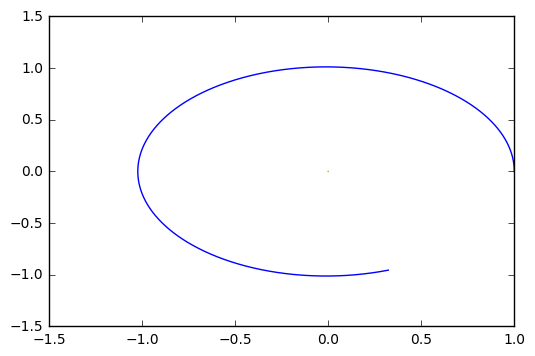

In [10]:
#Plot results
plt.figure()
plt.plot(xaAr/AU,yaAr/AU,'b')
plt.plot(xbAr/AU,ybAr/AU,'y')
plt.show()
